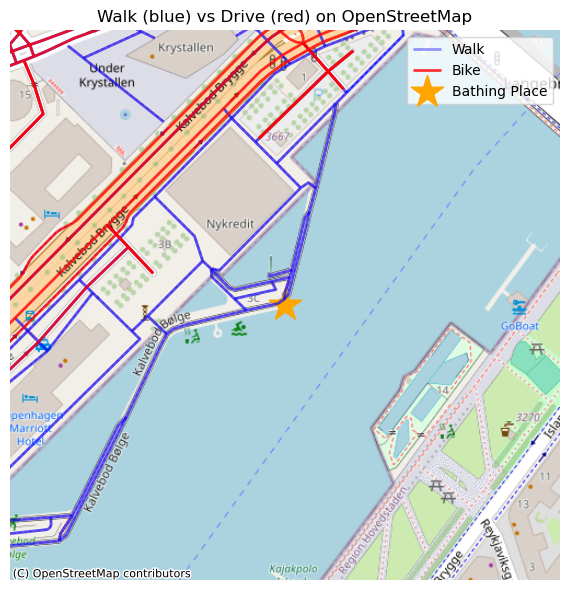

In [25]:
import osmnx as ox
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Set up location (e.g. Copenhagen)
location = (55.669028, 12.575483)
dist = 300  # meters

# Download both graphs
G_walk = ox.graph_from_point(location, dist=dist, network_type='walk')
G_drive = ox.graph_from_point(location, dist=dist, network_type='bike')

# Convert to GeoDataFrames
gdf_walk_edges = ox.graph_to_gdfs(G_walk, nodes=False, edges=True)
gdf_drive_edges = ox.graph_to_gdfs(G_drive, nodes=False, edges=True)

# Project to Web Mercator (needed for contextily)
gdf_walk_edges = gdf_walk_edges.to_crs(epsg=3857)
gdf_drive_edges = gdf_drive_edges.to_crs(epsg=3857)

# Create pinpoint GeoDataFrame
pinpoint_latlon = (55.66909722819186, 12.576254239086913)
point_geom = [Point(pinpoint_latlon[1], pinpoint_latlon[0])]  # (lon, lat)
gdf_point = gpd.GeoDataFrame(geometry=point_geom, crs="EPSG:4326")
gdf_point = gdf_point.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot walk edges in blue (transparent)
gdf_walk_edges.plot(ax=ax, linewidth=2.0, edgecolor='blue',
                    alpha=0.4, label='Walk')

# Plot drive edges in red
gdf_drive_edges.plot(ax=ax, linewidth=2.0, edgecolor='red',
                     alpha=0.8, label='Bike')

# Plot the pinpoint
gdf_point.plot(ax=ax, color='orange', marker='*',
               markersize=600, label='Bathing Place')

# Add background basemap (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Zoom in closer to pinpoint
buffer = 300  # meters
x, y = gdf_point.geometry.iloc[0].x, gdf_point.geometry.iloc[0].y
ax.set_xlim(x - buffer, x + buffer)
ax.set_ylim(y - buffer, y + buffer)

ax.set_axis_off()
ax.set_title("Walk (blue) vs Drive (red) on OpenStreetMap")
plt.legend()
plt.tight_layout()
plt.show()

                                                           geometry layer  \
element id                                                                  
way     4054540   LINESTRING (12.57577 55.6196, 12.57651 55.6214...   NaN   
        4245710   LINESTRING (12.52476 55.68134, 12.52545 55.681...    -1   
        4317977   LINESTRING (12.58502 55.66269, 12.58528 55.663...    -1   
        10075451  LINESTRING (12.53208 55.68116, 12.53216 55.681...    -1   
        10075453  LINESTRING (12.55283 55.68171, 12.55324 55.681...    -2   

                         name railway level            operator alt_name  \
element id                                                                 
way     4054540      Metro M1  subway   NaN  Metroselskabet I/S      NaN   
        4245710   Metro M1+M2  subway   NaN  Metroselskabet I/S      NaN   
        4317977      Metro M1  subway   NaN  Metroselskabet I/S      NaN   
        10075451  Metro M1+M2  subway   NaN  Metroselskabet I/S      NaN   
    

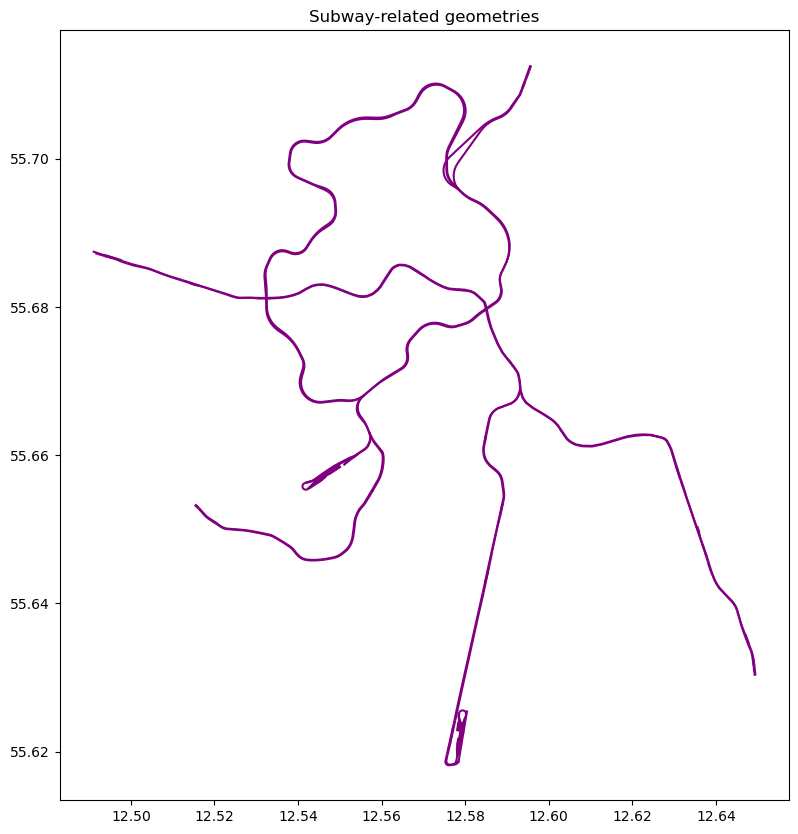

In [5]:
import osmnx as ox
import matplotlib.pyplot as plt

location = (55.672704, 12.565388)
tags = {"railway": "subway"}

gdf = ox.features_from_point(location, tags=tags, dist=10000)

print(gdf.head())
gdf.plot(figsize=(10, 10), color="purple")
plt.title("Subway-related geometries")
plt.show()

In [3]:
import osmnx
print(osmnx.__file__)
print(osmnx.__version__)

c:\Users\atakg\anaconda3\Lib\site-packages\osmnx\__init__.py
2.0.2


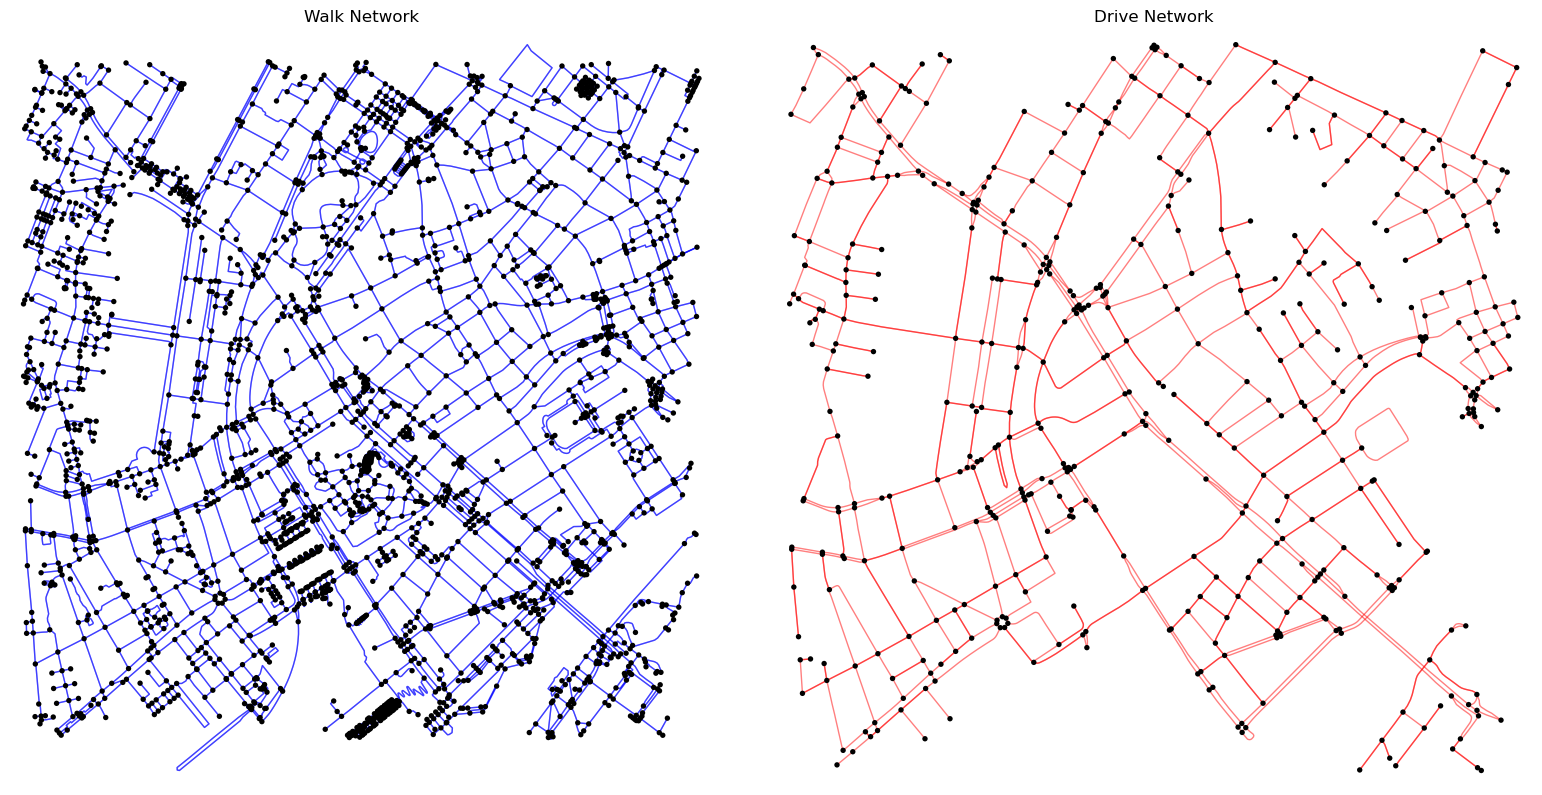

In [ ]:
import osmnx as ox
import contextily as ctx
import matplotlib.pyplot as plt

# Set up location and distance
location = (55.6761, 12.5683)  # Copenhagen center
dist = 1000  # meters

# Download walk and drive graphs
G_walk = ox.graph_from_point(location, dist=dist, network_type='walk')
G_drive = ox.graph_from_point(location, dist=dist, network_type='drive')

# Convert to GeoDataFrames (nodes and edges)
gdf_walk_nodes, gdf_walk_edges = ox.graph_to_gdfs(G_walk)
gdf_drive_nodes, gdf_drive_edges = ox.graph_to_gdfs(G_drive)

# Reproject to Web Mercator for plotting with contextily
gdf_walk_edges = gdf_walk_edges.to_crs(epsg=3857)
gdf_drive_edges = gdf_drive_edges.to_crs(epsg=3857)
gdf_walk_nodes = gdf_walk_nodes.to_crs(epsg=3857)
gdf_drive_nodes = gdf_drive_nodes.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot walk edges and nodes
gdf_walk_edges.plot(ax=ax, linewidth=0.5, edgecolor='blue', alpha=0.4, label='Walk edges')
gdf_walk_nodes.plot(ax=ax, color='blue', markersize=5, alpha=0.4, label='Walk nodes')

# Plot drive edges and nodes
gdf_drive_edges.plot(ax=ax, linewidth=1.0, edgecolor='red', alpha=0.8, label='Drive edges')
gdf_drive_nodes.plot(ax=ax, color='red', markersize=10, alpha=0.8, label='Drive nodes')

# Add map background
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()
ax.set_title("Walk (blue) vs Drive (red) with Nodes on OpenStreetMap")
plt.legend()
plt.tight_layout()
plt.show()


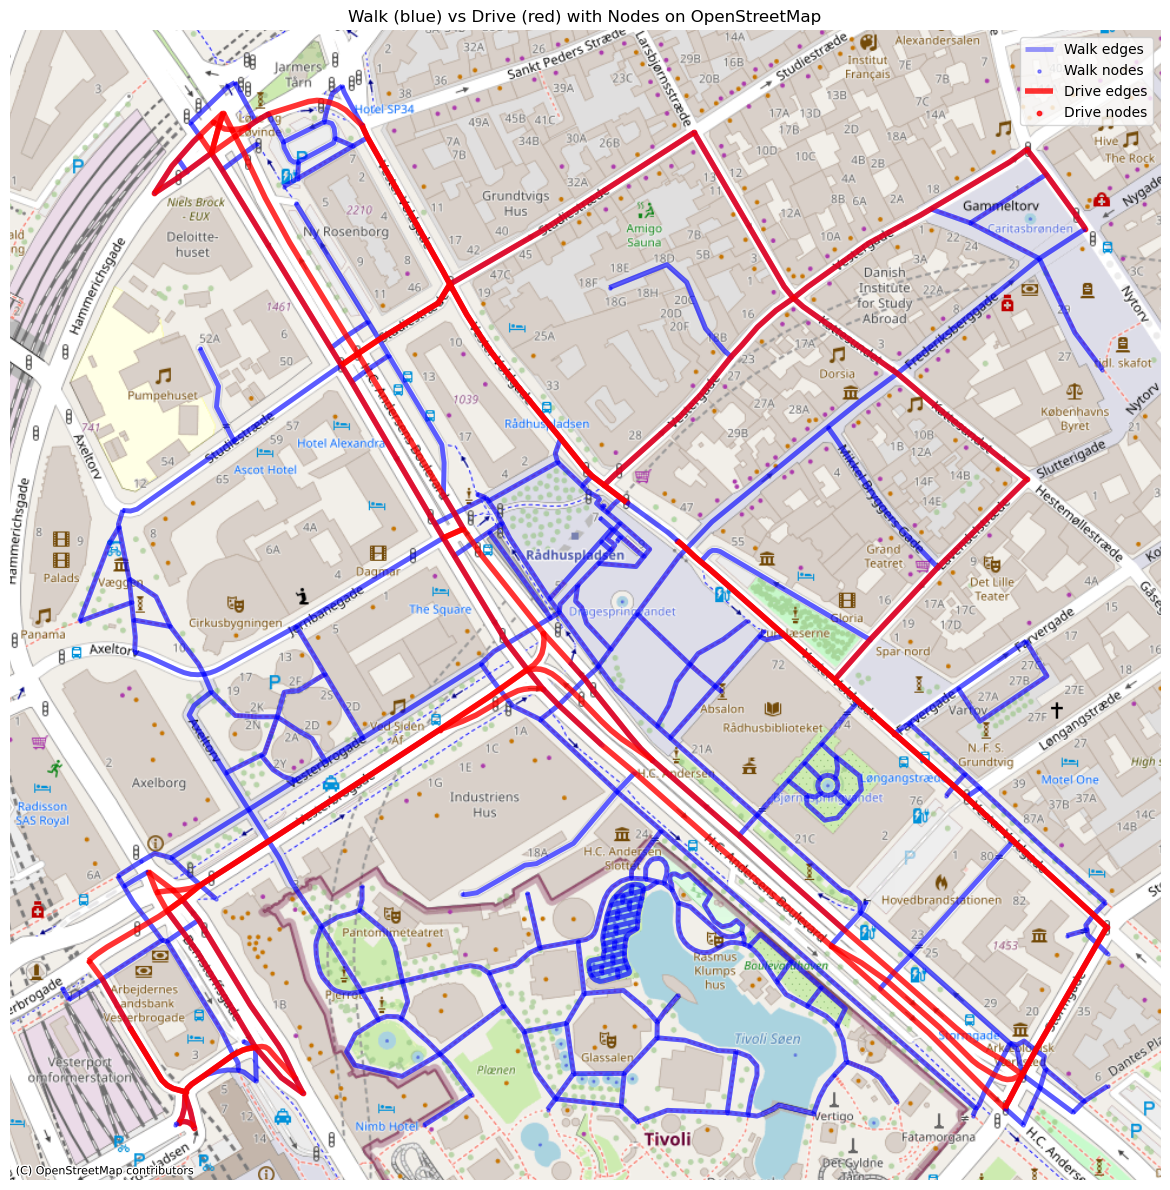

In [ ]:
import osmnx as ox
import contextily as ctx
import matplotlib.pyplot as plt

# Set up location and distance
location = (55.6761, 12.5683)  # Copenhagen center
dist = 300  # meters

# Download walk and drive graphs
G_walk = ox.graph_from_point(location, dist=dist, network_type='walk')
G_drive = ox.graph_from_point(location, dist=dist, network_type='drive')

# Convert to GeoDataFrames (nodes and edges)
gdf_walk_nodes, gdf_walk_edges = ox.graph_to_gdfs(G_walk)
gdf_drive_nodes, gdf_drive_edges = ox.graph_to_gdfs(G_drive)

# Reproject to Web Mercator for plotting with contextily
gdf_walk_edges = gdf_walk_edges.to_crs(epsg=3857)
gdf_drive_edges = gdf_drive_edges.to_crs(epsg=3857)
gdf_walk_nodes = gdf_walk_nodes.to_crs(epsg=3857)
gdf_drive_nodes = gdf_drive_nodes.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot walk edges and nodes
gdf_walk_edges.plot(ax=ax, linewidth=3.5, edgecolor='blue',
                    alpha=0.4, label='Walk edges')
gdf_walk_nodes.plot(ax=ax, color='blue', markersize=5,
                    alpha=0.4, label='Walk nodes')

# Plot drive edges and nodes
gdf_drive_edges.plot(ax=ax, linewidth=4.0, edgecolor='red',
                     alpha=0.8, label='Drive edges')
gdf_drive_nodes.plot(ax=ax, color='red', markersize=10,
                     alpha=0.8, label='Drive nodes')

# Add map background
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()
ax.set_title("Walk (blue) vs Drive (red) with Nodes on OpenStreetMap")
plt.legend()
plt.tight_layout()
plt.show()

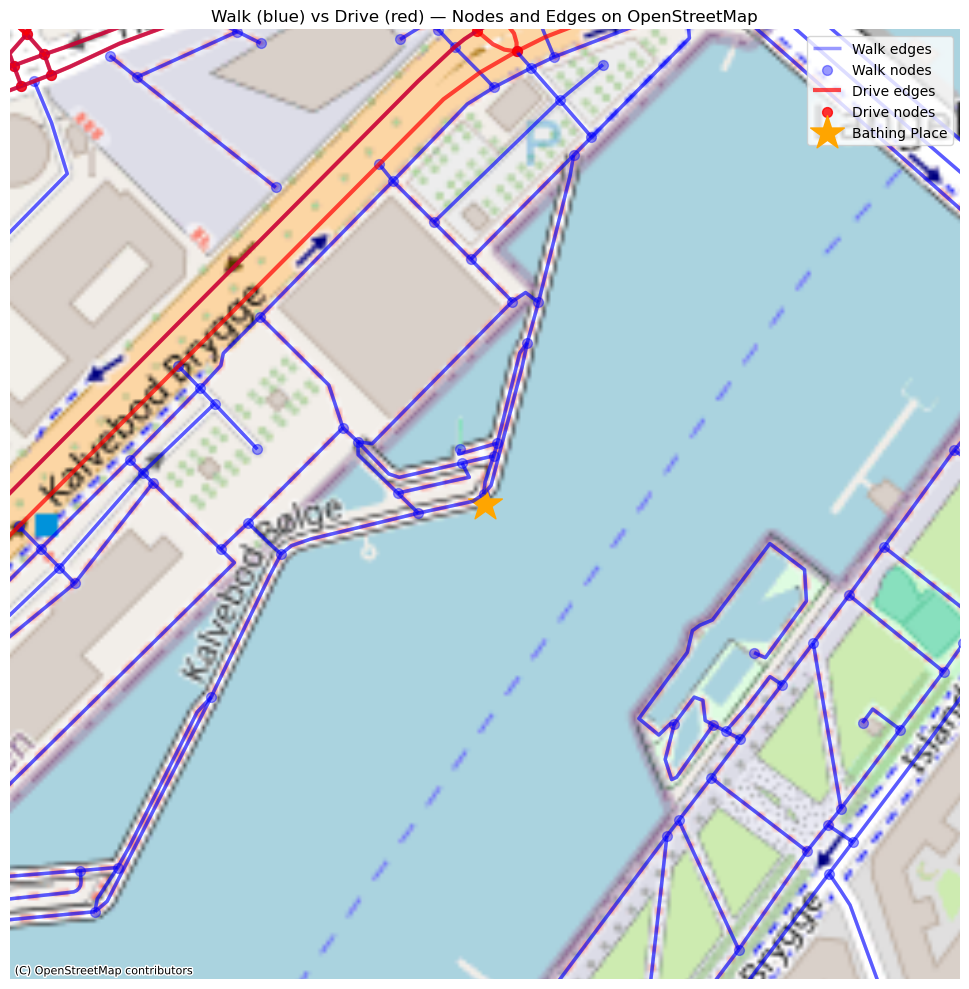

In [37]:
import osmnx as ox
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Set up location and zoom level (smaller = more zoomed in)
location = (55.670000, 12.574788)
dist = 400  # meters (smaller for zooming in)

# Download walk and drive graphs
G_walk = ox.graph_from_point(location, dist=dist, network_type='walk')
G_drive = ox.graph_from_point(location, dist=dist, network_type='drive')

# Convert to GeoDataFrames
gdf_walk_nodes, gdf_walk_edges = ox.graph_to_gdfs(G_walk)
gdf_drive_nodes, gdf_drive_edges = ox.graph_to_gdfs(G_drive)

# Reproject everything to Web Mercator for contextily
gdf_walk_nodes = gdf_walk_nodes.to_crs(epsg=3857)
gdf_walk_edges = gdf_walk_edges.to_crs(epsg=3857)
gdf_drive_nodes = gdf_drive_nodes.to_crs(epsg=3857)
gdf_drive_edges = gdf_drive_edges.to_crs(epsg=3857)

pinpoint_latlon = (55.66909722819186, 12.576254239086913)
point_geom = [Point(pinpoint_latlon[1], pinpoint_latlon[0])]  # (lon, lat)
gdf_point = gpd.GeoDataFrame(geometry=point_geom, crs="EPSG:4326")
gdf_point = gdf_point.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot walk network
gdf_walk_edges.plot(ax=ax, linewidth=2.5, edgecolor='blue',
                    alpha=0.4, label='Walk edges')
gdf_walk_nodes.plot(ax=ax, color='blue', markersize=50,
                    alpha=0.4, label='Walk nodes')

# Plot drive network
gdf_drive_edges.plot(ax=ax, linewidth=3.0, edgecolor='red',
                     alpha=0.7, label='Drive edges')
gdf_drive_nodes.plot(ax=ax, color='red', markersize=50,
                     alpha=0.8, label='Drive nodes')
# Plot the pinpoint
gdf_point.plot(ax=ax, color='orange', marker='*',
               markersize=650, label='Bathing Place')


# Add OSM background map
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Zoom in manually by setting limits around the pinpoint
x_center = gdf_point.geometry.x.values[0]
y_center = gdf_point.geometry.y.values[0]
buffer = 300  # adjust this value to zoom more or less
ax.set_xlim(x_center - buffer, x_center + buffer)
ax.set_ylim(y_center - buffer, y_center + buffer)

ax.set_axis_off()
ax.set_title("Walk (blue) vs Drive (red) — Nodes and Edges on OpenStreetMap")
plt.legend()
plt.tight_layout()
plt.show()